In [2]:
#import all the basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")

In [3]:
#import the dataset
url =  "https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/house_rental_data.csv.txt"
name = ["Sqft","Floor","TotalFloor","Bedroom","Living.Room","Bathroom","Price"]
df1 = pd.read_csv(url,names = name)

In [4]:
#checking
df1.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
NaN,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
1.0,1177.698,2,7,2,2,2,62000
2.0,2134.8,5,7,4,2,2,78000
3.0,1138.56,5,7,2,2,1,58000
4.0,1458.78,2,7,3,2,2,45000


In [5]:
#removing the unwanted 1st row
df1 = df1.iloc[1:]

In [6]:
#checking
df1.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
1.0,1177.698,2,7,2,2,2,62000
2.0,2134.8,5,7,4,2,2,78000
3.0,1138.56,5,7,2,2,1,58000
4.0,1458.78,2,7,3,2,2,45000
5.0,967.776,11,14,3,2,2,45000


In [7]:
#info of df1
df1.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 645 entries, 1.0 to 648.0
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Sqft         645 non-null    object
 1   Floor        645 non-null    object
 2   TotalFloor   645 non-null    object
 3   Bedroom      645 non-null    object
 4   Living.Room  645 non-null    object
 5   Bathroom     645 non-null    object
 6   Price        645 non-null    object
dtypes: object(7)
memory usage: 40.3+ KB


# Preprocessing of the Data

In [8]:
#converting the dataypes
df1["Sqft"] = df1['Sqft'].astype(float)

In [9]:
df1[['Floor','TotalFloor','Bedroom','Living.Room','Bathroom','Price']] = df1[['Floor','TotalFloor','Bedroom','Living.Room','Bathroom','Price']].apply(pd.to_numeric)

In [10]:
#checking the null values
df1.isna().sum()

Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

In [11]:
df1.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
1.0,1177.698,2,7,2,2,2,62000
2.0,2134.800,5,7,4,2,2,78000
3.0,1138.560,5,7,2,2,1,58000
4.0,1458.780,2,7,3,2,2,45000
5.0,967.776,11,14,3,2,2,45000


In [12]:
#after having the desired dataframe witht he desired datatypes 
#creating the copy of dataframe
df = df1.copy()

In [13]:
df.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
1.0,1177.698,2,7,2,2,2,62000
2.0,2134.800,5,7,4,2,2,78000
3.0,1138.560,5,7,2,2,1,58000
4.0,1458.780,2,7,3,2,2,45000
5.0,967.776,11,14,3,2,2,45000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 645 entries, 1.0 to 648.0
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sqft         645 non-null    float64
 1   Floor        645 non-null    int64  
 2   TotalFloor   645 non-null    int64  
 3   Bedroom      645 non-null    int64  
 4   Living.Room  645 non-null    int64  
 5   Bathroom     645 non-null    int64  
 6   Price        645 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 40.3 KB


In [15]:
#summary of the dataframe
df.describe()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,1527.656260,5.939535,10.855814,2.837209,1.813953,1.810853,61986.823256
std,767.386531,3.884721,4.996208,1.010740,0.462364,0.683574,35635.091007
min,359.358000,1.000000,1.000000,1.000000,0.000000,0.000000,6100.000000
25%,925.080000,3.000000,7.000000,2.000000,2.000000,1.000000,39000.000000
50%,1423.200000,5.000000,12.000000,3.000000,2.000000,2.000000,50000.000000
75%,1892.856000,8.000000,14.000000,4.000000,2.000000,2.000000,75000.000000
max,5856.468000,22.000000,38.000000,7.000000,4.000000,5.000000,250000.000000


# Exploratory Data Analysis

Text(0.5, 1.0, 'Distribution of Price')

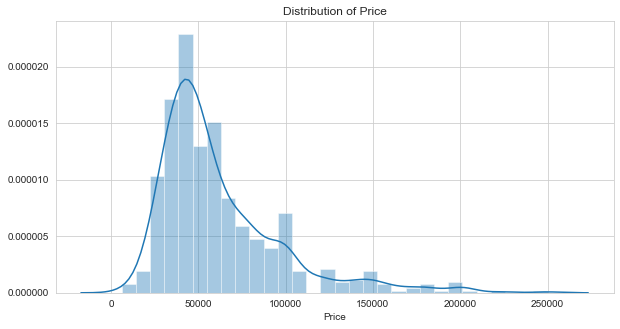

In [16]:
#Distribution of the target feature - "Price"
plt.figure(figsize=(10,5))
sns.distplot(df["Price"])
plt.title("Distribution of Price")

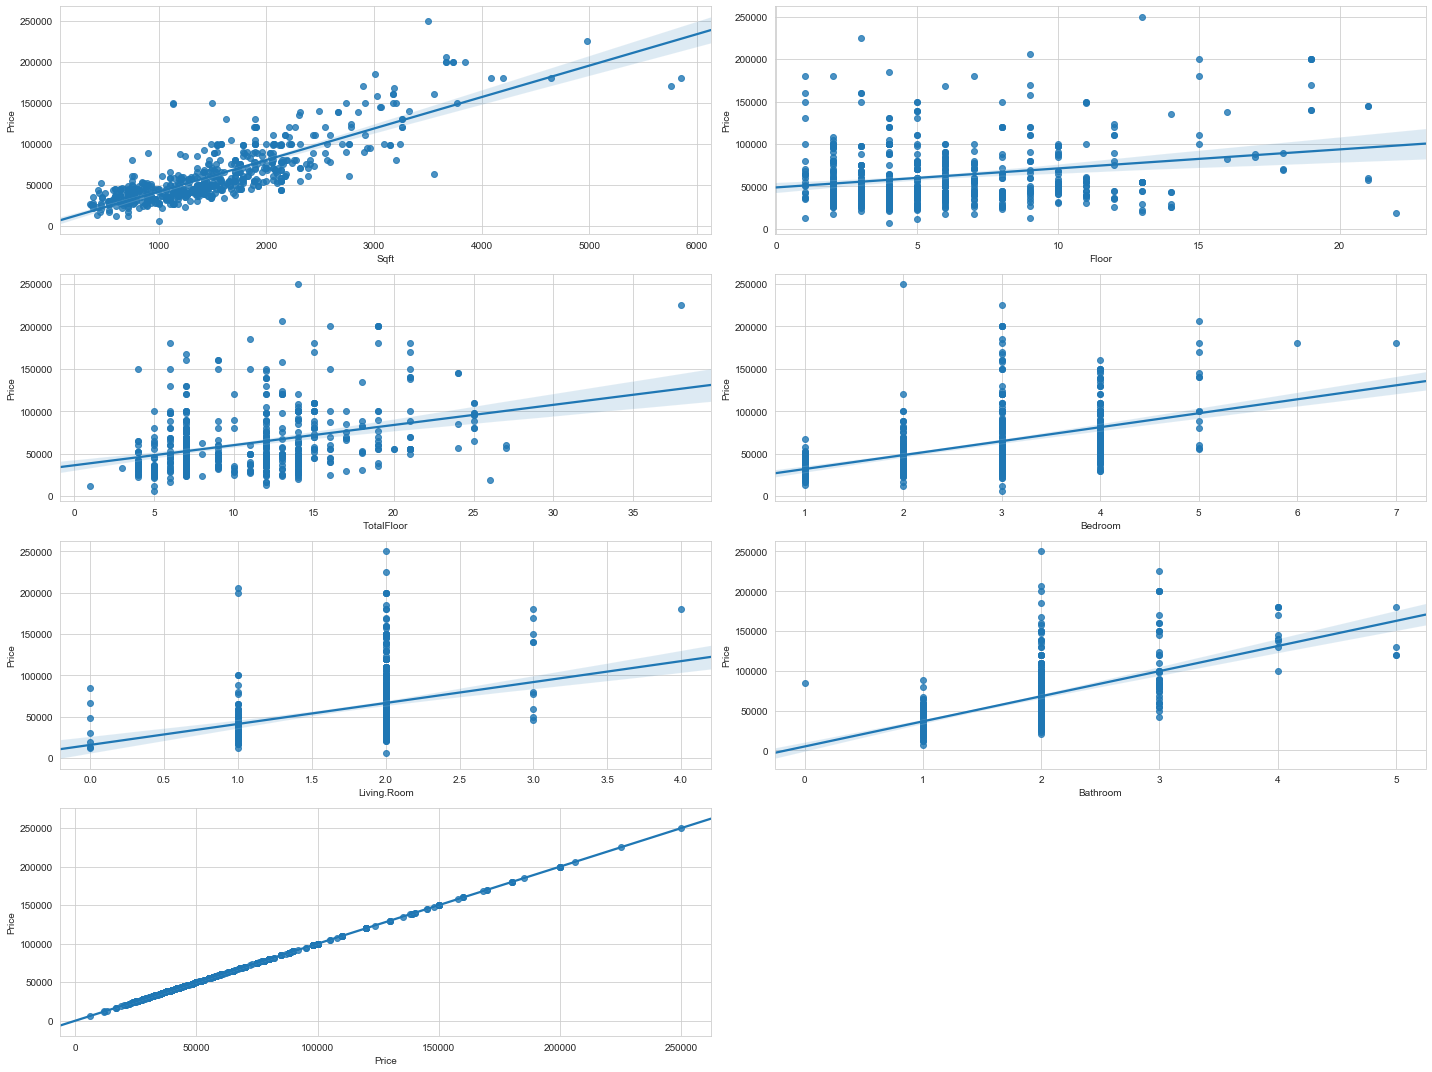

In [17]:
#scatter plot of every feature with target feature to gather insights on the outliers
plt.figure(figsize=(20,15))
for i,v in enumerate(df.columns,start=1):
    plt.subplot(4,2,i)
    sns.regplot(data=df,x=v,y="Price")
plt.tight_layout()

#### Removing the outliers as per the scatter plot above

In [18]:
df[df["Floor"]>20]

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
28.0,3059.880,21,24,4,2,3,145000
41.0,3063.438,21,24,5,2,4,145000
246.0,1899.972,21,27,4,2,2,57000
369.0,537.258,22,26,1,0,1,19000
603.0,1458.780,21,27,3,2,2,60000


In [19]:
df.drop((df[df["Floor"]>20]).index, inplace = True)

In [20]:
df.shape

(640, 7)

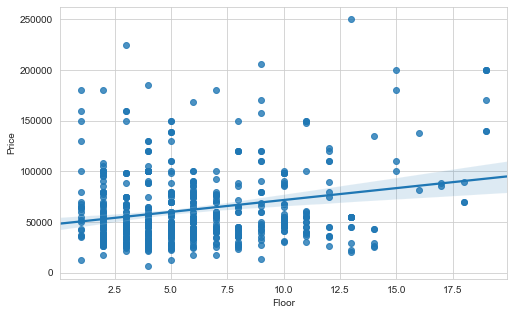

In [21]:
plt.figure(figsize=(8,5))
sns.regplot(data=df,x="Floor",y="Price")

In [22]:
df.drop(df[df["TotalFloor"]>35].index,inplace = True)

In [23]:
df.shape

(639, 7)

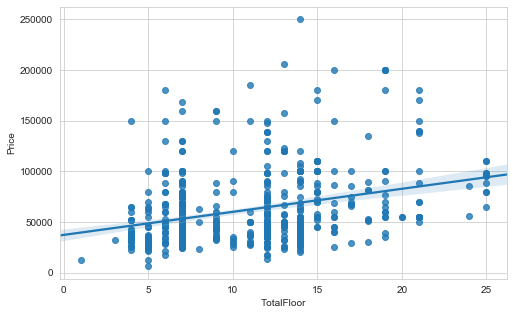

In [24]:
plt.figure(figsize=(8,5))
sns.regplot(data=df,x="TotalFloor",y="Price")

In [25]:
df[df["Living.Room"]>3.9]

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
55.0,4643.19,1,6,5,4,4,180000


In [26]:
df.drop(df[df["Living.Room"]>3.9].index,inplace =True)

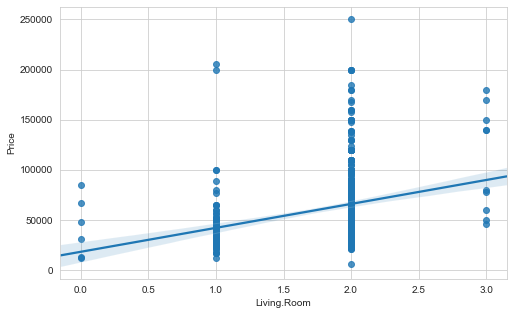

In [27]:
plt.figure(figsize=(8,5))
sns.regplot(data=df,x="Living.Room",y="Price")

In [28]:
df[df["Bathroom"]==0]

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
32.0,1245.3,10,12,3,0,0,85000


In [29]:
df.drop(df[df["Bathroom"]==0].index,inplace = True)

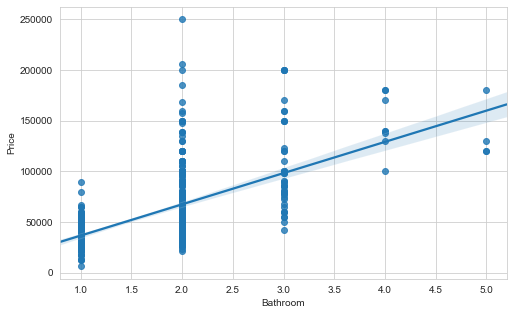

In [30]:
plt.figure(figsize=(8,5))
sns.regplot(data=df,x="Bathroom",y="Price")

## Corelation of feature with each other through heat map


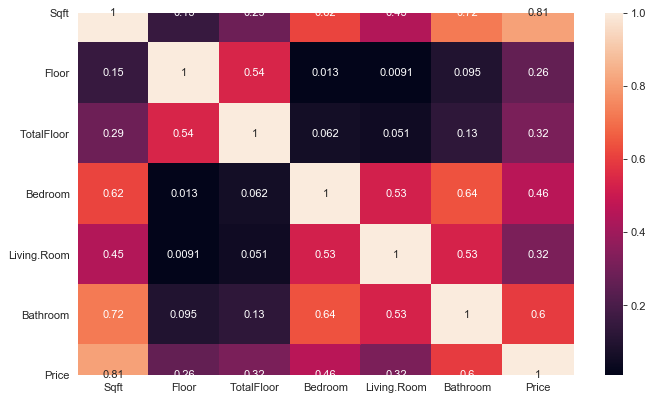

In [31]:
plt.figure(figsize=(10,6),dpi=80)
sns.heatmap(df.corr(),annot=True)

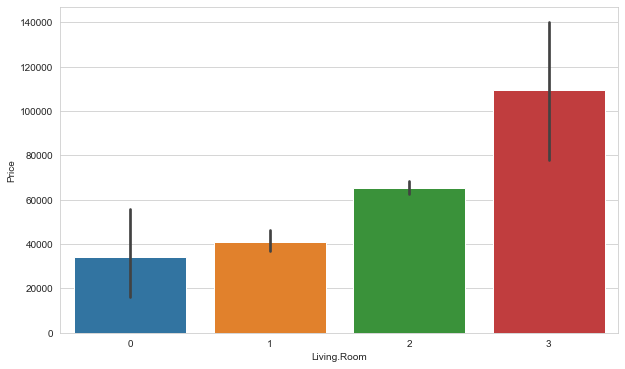

In [32]:
plt.figure(figsize=(10,6))
sns.barplot(data=df,x="Living.Room",y="Price")

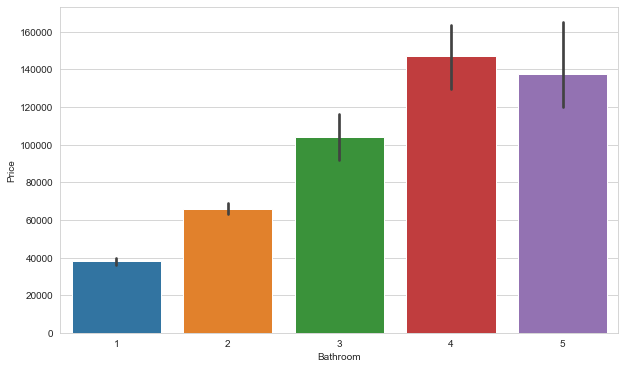

In [33]:
plt.figure(figsize=(10,6))
sns.barplot(data=df,x="Bathroom",y="Price")

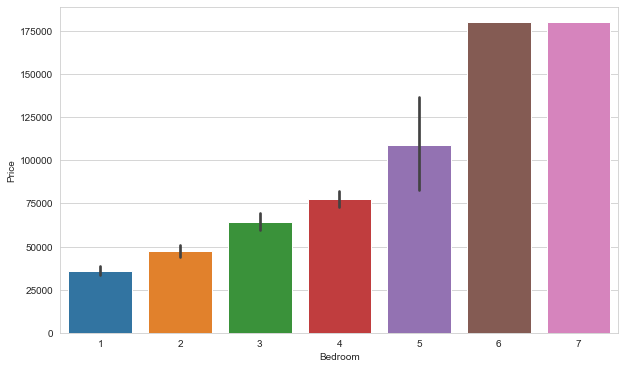

In [34]:
plt.figure(figsize=(10,6))
sns.barplot(data=df,x="Bedroom",y="Price")

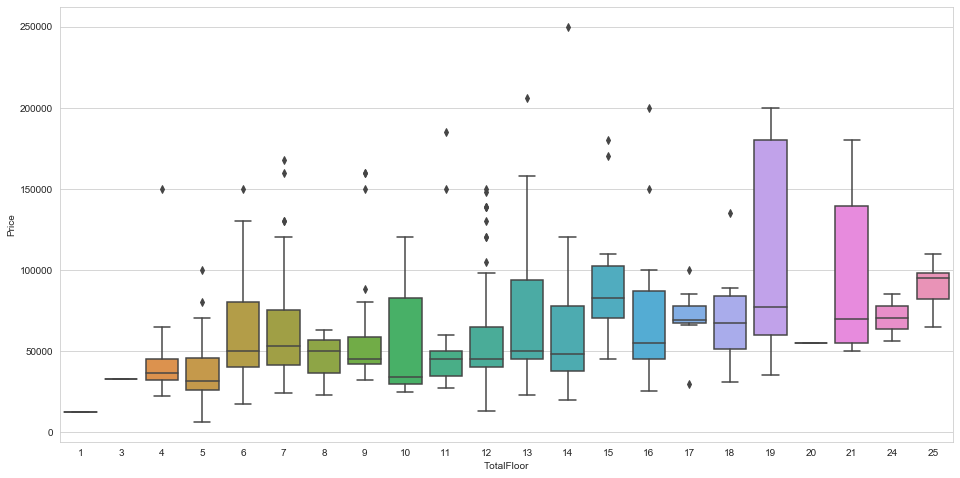

In [35]:
plt.figure(figsize=(16,8))
sns.boxplot(data=df,x="TotalFloor",y="Price")

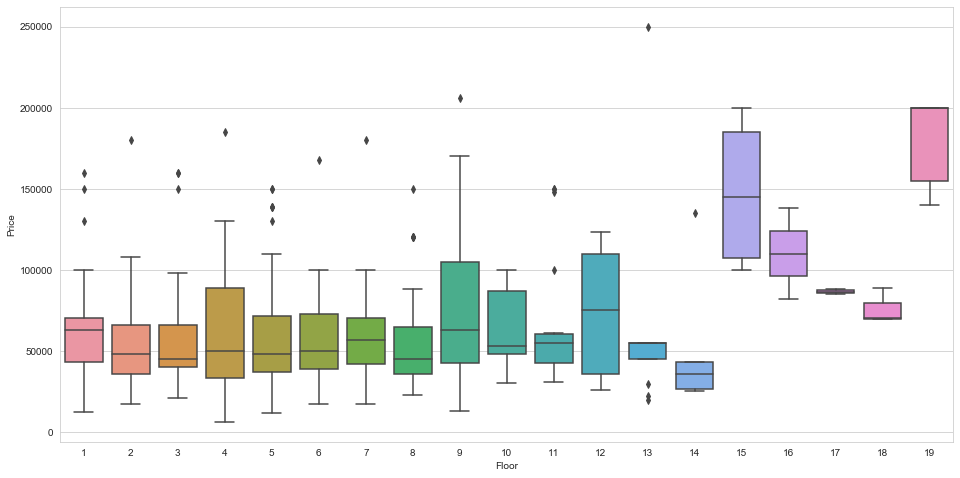

In [36]:
plt.figure(figsize=(16,8))
sns.boxplot(data=df,x="Floor",y="Price")

# Creating the ML model with KNN

### Scling the data

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
scaler = StandardScaler()

In [39]:
df[['Sqft', 'Floor', 'TotalFloor', 'Bedroom', 'Living.Room', 'Bathroom']] = scaler.fit_transform(df[['Sqft', 'Floor', 'TotalFloor', 'Bedroom', 'Living.Room', 'Bathroom']])

In [40]:
df.columns

Index(['Sqft', 'Floor', 'TotalFloor', 'Bedroom', 'Living.Room', 'Bathroom',
       'Price'],
      dtype='object')

In [41]:
df.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
1.0,-0.452743,-1.047580,-0.784277,-0.825427,0.416278,0.293644,62000
2.0,0.835557,-0.226109,-0.784277,1.166229,0.416278,0.293644,78000
3.0,-0.505424,-0.226109,-0.784277,-0.825427,0.416278,-1.202766,58000
4.0,-0.074395,-1.047580,-0.784277,0.170401,0.416278,0.293644,45000
5.0,-0.735307,1.416834,0.698169,0.170401,0.416278,0.293644,45000


### spliting the data frame for training and testing

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
x = df.drop("Price",axis = 1)
y = df["Price"]

In [44]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=101)

In [45]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(509, 6)
(128, 6)
(509,)
(128,)


## importing KNN from sklearn

In [46]:
from sklearn.neighbors import KNeighborsRegressor

In [48]:
knn = KNeighborsRegressor(n_neighbors = 5)

In [49]:
knn.fit(xtrain,ytrain)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [50]:
pred = knn.predict(xtest)

In [52]:
from sklearn.metrics import mean_squared_error

In [53]:
print(round(mean_squared_error(ytest,pred),2))

324432558.51


In [54]:
print(np.sqrt(round(mean_squared_error(ytest,pred),2)))

18012.011506491996


In [55]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    pred_i = knn.predict(xtest)
    error_rate.append(np.mean(pred_i != ytest))

Text(0, 0.5, 'Error Rate')

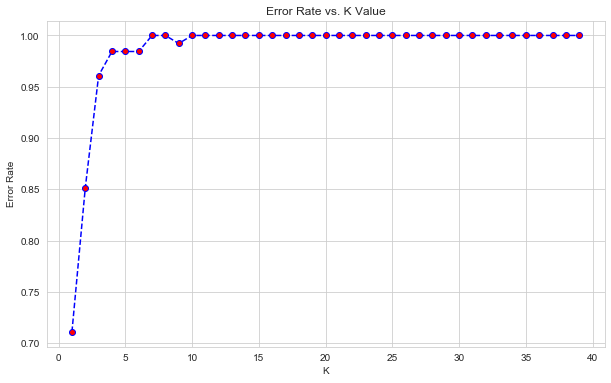

In [56]:
#checking the least error value
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red')
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [64]:
knn2 = KNeighborsRegressor(n_neighbors = 3)

In [65]:
knn2.fit(xtrain,ytrain)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [66]:
pred2 = knn2.predict(xtest)

In [67]:
print(round(mean_squared_error(ytest,pred2),2))

362787533.85


In [68]:
print(np.sqrt(round(mean_squared_error(ytest,pred2),2)))

19046.98227672825
